In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['embeddings', 'train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
import os
from tqdm import tqdm
import re
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from datetime import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import mean_squared_error
from math import sqrt

Using TensorFlow backend.


In [3]:
EMBEDDING_FILE = '../input/embeddings/glove.840B.300d/glove.840B.300d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:300]
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

In [4]:
i = 0
words = []
values = []
for word, value in embeddings_index.items():
    words.append(word)
    values.append(value)
    i += 1
    if i == 500:
        break

In [5]:
import numpy as np
values = np.array(values)
print(values.shape)

(500, 300)


In [6]:
import tensorflow as tf
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
def plot_with_labels(low_dim_embs, labels, filename):
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points', #注释文字的偏移量
        ha='right',
        va='bottom')

  plt.savefig(filename)

In [8]:
sess = tf.Session()
embedding_size=300
vocabulary_size=500
embeddings = tf.placeholder(tf.float32, shape=[vocabulary_size, embedding_size])
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
normalized_embeddings = embeddings/norm

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
feed_dict = {embeddings:values}
final_embeddings = sess.run(normalized_embeddings, feed_dict=feed_dict)

In [10]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
low_dim_embs = tsne.fit_transform(final_embeddings[:500, :])

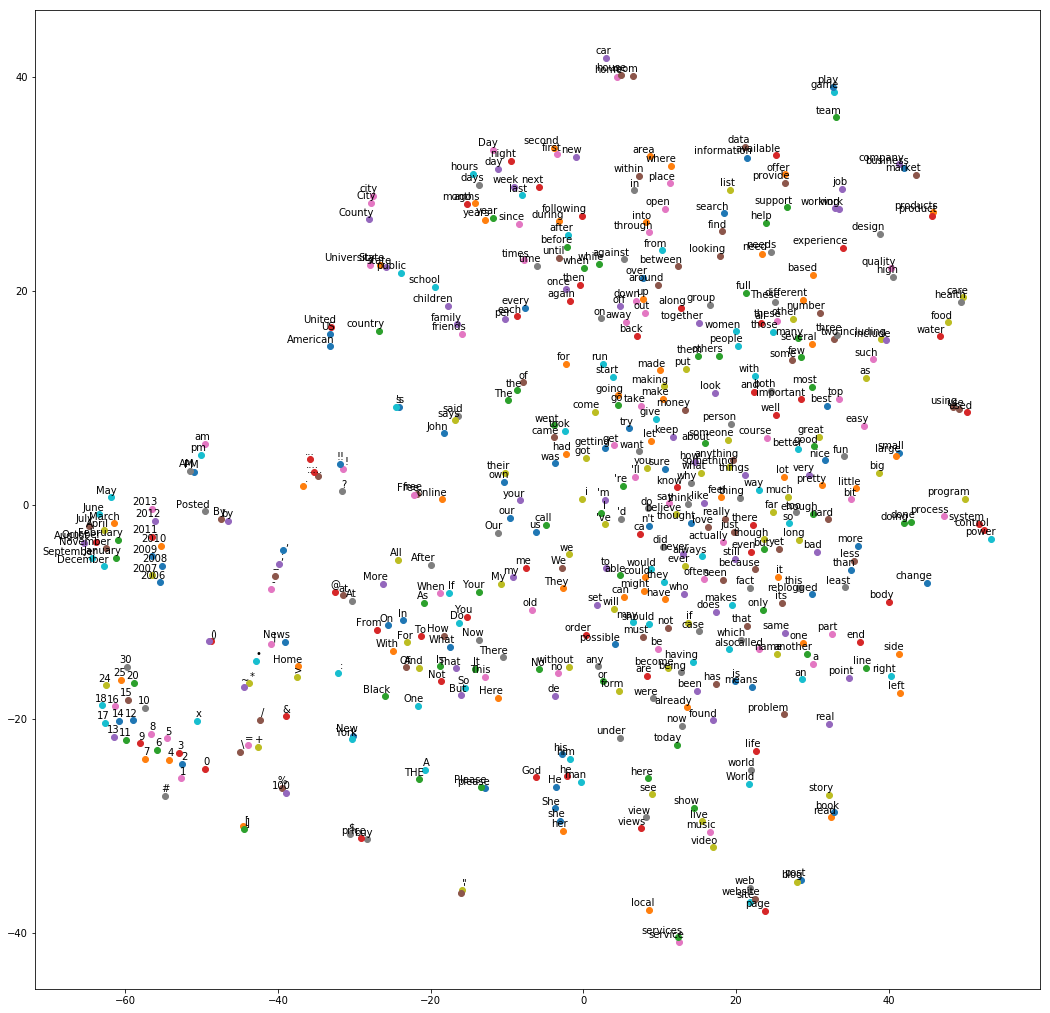

In [11]:
plot_with_labels(low_dim_embs, words, 'show.png')
